<a href="https://colab.research.google.com/github/Abdullah-Saikat/Student_Mental_health_Prediction/blob/main/mental_health_treatment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task for Today  

***

## Mental Health Treatment Prediction  

Given *data about the mental health of employees in the tech industry*, let's try to predict whether a given subject has **sought treatment** in the past.  
  
We will use a TensorFlow ANN to make our predictions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting Started

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SURVEY DATA/survey-data.csv')


In [ ]:
data.head()

,Timestamp,Age,Gender,City,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,27,Female,Dhaka,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,22,M,Dhaka,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,22,Male,Rajshahi,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,21,Male,Chittagong,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,21,Male,Dhaka,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Cleaning

In [ ]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
City                            0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
data = data.drop('comments', axis=1)


In [ ]:
data = data.drop('state', axis=1)

In [ ]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
City                           0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
data['self_employed'].mode()

0    No
dtype: object

In [ ]:
data['self_employed'] = data['self_employed'].fillna('No')

In [ ]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [ ]:
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

# Feature Engineering

In [ ]:
data.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
City                         0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
data['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255     2015-09-26 1:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [ ]:
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))
data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:12]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:15]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
# data['Timestamp']

# Encoding Features

In [ ]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'City': 46,
 'Gender': 49,
 'anonymity': 3,
 'benefits': 3,
 'care_options': 3,
 'coworkers': 3,
 'family_history': 2,
 'leave': 5,
 'mental_health_consequence': 3,
 'mental_health_interview': 3,
 'mental_vs_physical': 3,
 'no_employees': 6,
 'obs_consequence': 2,
 'phys_health_consequence': 3,
 'phys_health_interview': 3,
 'remote_work': 2,
 'seek_help': 3,
 'self_employed': 2,
 'supervisor': 3,
 'tech_company': 2,
 'treatment': 2,
 'wellness_program': 3,
 'work_interfere': 4}

In [ ]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'City': ['Dhaka',
  'Rajshahi',
  'Chittagong',
  'Barishal',
  'Khulna',
  'Pirojpur',
  'Noyakhali',
  'Shirajgonj',
  'Potuakhali',
  'Narayangonj',
  'Rajbari',
  'Modhupur',
  'Bagherhat',
  'Cumilla',
  'Syllet',
  'Jossore',
  'Dinajpur',
  'Moymonsinh',
  'Faridpur',
  'Bogra',
  'Pabna',
  'Rangamati',
  'Kushtia',
  'Rangpur',
  'Tangail',
  'Panchagarh',
  'Vola',
  'Bandharban',
  'Chandpur',
  'Habiganj',
  'Barguna',
  'Jhalkati',
  'Jhenaidah',
  'Jhalakathi',
  'Magura',
  'Lalmonirhat',
  'Kurigram',
  'Nilphamari',
  'Shatkhira',
  'Chuadanga',
  'Meherpur',
  'Joypurhat',
  'Natore',
  'Feni',
  'Sunamganj',
  'Gopalganj'],
 'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Fe

In [ ]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [ ]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [ ]:
data['Gender']

0       0
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: Gender, Length: 1259, dtype: int64

In [ ]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]

nominal_features = [
    'City',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [ ]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [ ]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [ ]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,ph_Yes,cw_Maybe,cw_No,cw_Yes,su_Maybe,su_No,su_Yes,mi_Don't know,mi_No,mi_Yes
0,27,0,0,0,Yes,3,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,22,1,0,0,No,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,22,1,0,0,No,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,21,1,0,1,Yes,3,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,21,1,0,0,No,0,3,1,1,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1255,22,1,0,1,Yes,3,2,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1256,22,1,0,1,Yes,2,5,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1257,26,0,0,0,No,2,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0


# Encoding Labels

In [ ]:
data = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [ ]:
data['treatment']

0       1
1       0
2       0
3       1
4       0
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: treatment, Length: 1259, dtype: int64

In [ ]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [ ]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


# Splitting/Scaling

In [ ]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=100)

# Training

In [ ]:
X.shape

(1259, 102)

In [ ]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 50.5% / 49.5%


In [ ]:
y_train.mean()

0.5048543689320388

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
15/15 [==============================] - 1s 55ms/step - loss: 0.6114 - accuracy: 0.6678 - auc: 0.7407 - val_loss: 0.7032 - val_accuracy: 0.6784 - val_auc: 0.7310 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - 0s 25ms/step - loss: 0.4685 - accuracy: 0.7848 - auc: 0.8620 - val_loss: 0.6990 - val_accuracy: 0.6696 - val_auc: 0.7316 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 0.3909 - accuracy: 0.8300 - auc: 0.9064 - val_loss: 0.7419 - val_accuracy: 0.6388 - val_auc: 0.7225 - lr: 0.0010
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 0.3218 - accuracy: 0.8543 - auc: 0.9384 - val_loss: 0.8129 - val_accuracy: 0.6211 - val_auc: 0.7003 - lr: 0.0010
Epoch 5/50
15/15 [==============================] - 0s 24ms/step - loss: 0.2675 - accuracy: 0.8996 - auc: 0.9608 - val_loss: 0.9440 - val_accuracy: 0.5991 - val_auc: 0.6815 - lr: 0.0010
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - los

In [ ]:
model

# Results

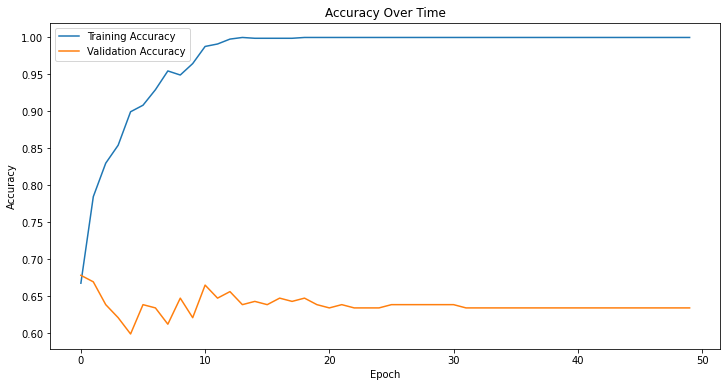

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [ ]:
acc=model.evaluate(X_test, y_test)
print("Loss :",round(acc[0]),"%")
print("Accuracy :",round(acc[1]*100),"%")

4/4 [==============================] - 0s 5ms/step - loss: 1.2789 - accuracy: 0.7540 - auc: 0.7803
Loss : 1 %
Accuracy : 75 %


In [ ]:
pred = model.predict(X_test[5:6])
pred = pred*100

if pred <= 50:
  print("This person Depressed. Treatment Required")
elif pred >50:
  print("This person is normal. Treatment not neccessary")

This person Depressed. Treatment Required


In [ ]:
# test_data = pd.read_csv('/content/drive/MyDrive/SURVEY DATA/survey-data.csv')
# pred = model.predict(test_data[2:3])
# pred = pred*100
# pred

# Data Every Day  

This notebook is featured on Data Every Day, a YouTube series where I train models on a new dataset each day.  

***

Check it out!  
https://youtu.be/G0Wh-xTnCHs